In [2]:
from trainTWEC import train_period


train_period(1994, 2021, "engineering")

In [4]:
train_period(1994, 2021, "material science")

In [5]:
from twec.twec import TWEC


aligner = TWEC(size=300, siter=10, diter=10, workers=4)
aligner.train_compass("compare_engi/data_augmented/compass.txt", overwrite=False)
for yr in range(1994, 2021):
    year_str = str(yr)
    slice = aligner.train_slice("compare_engi/data_augmented/" + year_str + ".txt", save=True)
    slice.save("compare_engi/model/" + year_str + ".model")

Compass loaded from file.
Training temporal embeddings: slice compare_engi/data_augmented/1994.txt.
Initializing temporal embeddings from the atemporal compass.
Training temporal embeddings: slice compare_engi/data_augmented/1995.txt.
Initializing temporal embeddings from the atemporal compass.
Training temporal embeddings: slice compare_engi/data_augmented/1996.txt.
Initializing temporal embeddings from the atemporal compass.
Training temporal embeddings: slice compare_engi/data_augmented/1997.txt.
Initializing temporal embeddings from the atemporal compass.
Training temporal embeddings: slice compare_engi/data_augmented/1998.txt.
Initializing temporal embeddings from the atemporal compass.
Training temporal embeddings: slice compare_engi/data_augmented/1999.txt.
Initializing temporal embeddings from the atemporal compass.
Training temporal embeddings: slice compare_engi/data_augmented/2000.txt.
Initializing temporal embeddings from the atemporal compass.
Training temporal embeddings:

In [6]:
aligner = TWEC(size=300, siter=10, diter=10, workers=4)
aligner.train_compass("compare_matsci/data_augmented/compass.txt", overwrite=False)
for yr in range(1994, 2021):
    year_str = str(yr)
    slice = aligner.train_slice("compare_matsci/data_augmented/" + year_str + ".txt", save=True)
    slice.save("compare_matsci/model/" + year_str + ".model")

Compass loaded from file.
Training temporal embeddings: slice compare_matsci/data_augmented/1994.txt.
Initializing temporal embeddings from the atemporal compass.
Training temporal embeddings: slice compare_matsci/data_augmented/1995.txt.
Initializing temporal embeddings from the atemporal compass.
Training temporal embeddings: slice compare_matsci/data_augmented/1996.txt.
Initializing temporal embeddings from the atemporal compass.
Training temporal embeddings: slice compare_matsci/data_augmented/1997.txt.
Initializing temporal embeddings from the atemporal compass.
Training temporal embeddings: slice compare_matsci/data_augmented/1998.txt.
Initializing temporal embeddings from the atemporal compass.
Training temporal embeddings: slice compare_matsci/data_augmented/1999.txt.
Initializing temporal embeddings from the atemporal compass.
Training temporal embeddings: slice compare_matsci/data_augmented/2000.txt.
Initializing temporal embeddings from the atemporal compass.
Training tempor

In [7]:
from gensim.models.word2vec import Word2Vec


all_eng_twec_models = []
for i in range(1994, 2021):
    cur_model = Word2Vec.load("compare_engi/model/" + str(i) + ".model")
    all_eng_twec_models.append(cur_model)
len(all_eng_twec_models)

27

In [8]:
from gensim.models.word2vec import Word2Vec


all_che_twec_models = []
for i in range(1994, 2021):
    cur_model = Word2Vec.load("compare_matsci/model/" + str(i) + ".model")
    all_che_twec_models.append(cur_model)
len(all_che_twec_models)

27

# eng = cs != che

In [11]:
all_che_twec_models[0].wv.most_similar("deep"), all_che_twec_models[-1].wv.most_similar("deep")

([('shallow', 0.9029552936553955),
  ('beneath', 0.8648598194122314),
  ('deeper', 0.8246035575866699),
  ('nearsurface', 0.781489372253418),
  ('subsurface', 0.7745077013969421),
  ('depths', 0.7670105695724487),
  ('near', 0.7643306255340576),
  ('mangrove', 0.7606254816055298),
  ('penetrates', 0.7562394142150879),
  ('overlying', 0.750140368938446)],
 [('subsurface', 0.7091749906539917),
  ('oilbased', 0.6812076568603516),
  ('finegrained', 0.6778250932693481),
  ('compacted', 0.6741280555725098),
  ('weathered', 0.6490625739097595),
  ('supercooled', 0.6458296179771423),
  ('mitigated', 0.6415791511535645),
  ('trace', 0.6383805871009827),
  ('contrasting', 0.6375534534454346),
  ('wax', 0.6304399967193604)])

In [14]:
all_eng_twec_models[0].wv.most_similar("deep"), all_eng_twec_models[-1].wv.most_similar("deep")

([('shallow', 0.9131819605827332),
  ('boreholes', 0.8558334112167358),
  ('submerged', 0.8489603400230408),
  ('grouting', 0.8359252214431763),
  ('embankments', 0.8131369948387146),
  ('drilled', 0.8093295097351074),
  ('beneath', 0.8059485554695129),
  ('embankment', 0.804667055606842),
  ('abutments', 0.8036298751831055),
  ('snow', 0.8024632930755615)],
 [('convolutional', 0.7436361908912659),
  ('cnn', 0.7229127883911133),
  ('bpnn', 0.7015492916107178),
  ('autoencoder', 0.6996005773544312),
  ('artificial', 0.6885647177696228),
  ('stacked', 0.6803814768791199),
  ('semisupervised', 0.6771562695503235),
  ('dcnn', 0.6690883040428162),
  ('belief', 0.6603023409843445),
  ('unsupervised', 0.6559293270111084)])

# eng = che != cs

In [12]:
all_che_twec_models[0].wv.most_similar("machine"), all_che_twec_models[-1].wv.most_similar("machine")

([('equipment', 0.8151068687438965),
  ('board', 0.7983125448226929),
  ('machines', 0.795161247253418),
  ('designs', 0.7710748314857483),
  ('hardware', 0.769377589225769),
  ('bracket', 0.7545551657676697),
  ('multipurpose', 0.753517210483551),
  ('manual', 0.7370278835296631),
  ('modular', 0.7350579500198364),
  ('rack', 0.7276436686515808)],
 [('vector', 0.8534864783287048),
  ('svm', 0.8188668489456177),
  ('lssvm', 0.7946640849113464),
  ('classifiers', 0.7845202684402466),
  ('learning', 0.7785246968269348),
  ('algorithms', 0.7760773301124573),
  ('classifier', 0.7627707123756409),
  ('xgboost', 0.7594764828681946),
  ('svr', 0.7563967108726501),
  ('supervised', 0.7518418431282043)])

In [13]:
all_eng_twec_models[0].wv.most_similar("machine"), all_eng_twec_models[-1].wv.most_similar("machine")

([('cnc', 0.8687925934791565),
  ('machines', 0.7988117933273315),
  ('spindle', 0.7604249715805054),
  ('milling', 0.7403925657272339),
  ('machining', 0.7147791385650635),
  ('punch', 0.7076475024223328),
  ('edm', 0.707257091999054),
  ('rotary', 0.6997557282447815),
  ('grinding', 0.6901564598083496),
  ('disk', 0.6829250454902649)],
 [('svm', 0.802581787109375),
  ('machines', 0.8004786968231201),
  ('cnc', 0.7698453068733215),
  ('supervised', 0.7591891288757324),
  ('hts', 0.7534210681915283),
  ('vector', 0.7488338947296143),
  ('elm', 0.7267014980316162),
  ('translation', 0.710526704788208),
  ('lssvm', 0.6927847266197205),
  ('surfacemounted', 0.6859992742538452)])

# wordcloud

In [15]:
eng_data_path = "compare_engi/data_augmented/"
eng_mod_path = "compare_engi/model/"
che_data_path = "compare_matsci/data_augmented/"
che_mod_path = "compare_matsci/model/"

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
def plot_wordcloud(d):
    wc = WordCloud()
    wc.fit_words(d)
    fig = plt.figure(figsize=(12,6))
    ax = fig.add_subplot(111)
    ax.imshow(wc)
    ax.axis('off')

In [ ]:
#plot_wordcloud(Counter())

# PCA | tSNE word 1994-2020
& its most similar top 3 words in 94 & 20

In [76]:
from sklearn.decomposition import PCA
from matplotlib.pyplot import scatter, text, title
import numpy #as np


def plot_word_period_shift(word, all_models, start, FIELD):
    WORD = word # "deep"
    vec_ls = []
    for model in all_models:
        vec_ls.append(model.wv[WORD])

    pca = PCA(n_components=2)
    reduced_vec_ar = pca.fit_transform(vec_ls)

    yr = start
    for x, y in reduced_vec_ar:
        scatter(x, y, c="b")
        text(x, y, s=str(yr), size='x-small', alpha=0.9, position=(x+0.1,y-0.1))
        yr += 1
    title(f"\"{WORD}\" 's word change in {FIELD} over time")

def plot_context_PPMI():
    pass # TODO: Roy (Jun Xing)

# these plots were wrong

In [110]:
from matplotlib.pyplot import legend


def plot_semantic_neighbors(model, word, topk=3, color='r'):
    wds = [wd for wd, _ in model.wv.most_similar(word, topn=topk)]
    vec_ls = []
    for wd in wds:

        vec_ls.append(model.wv[wd]) # append wd to arrays as well....
    reduced_vecs = PCA(n_components=2).fit_transform(vec_ls)
    i = 0
    for x, y in reduced_vecs:
        scatter(x, y, c=color)
        text(x, y, s=wds[i])

        i += 1

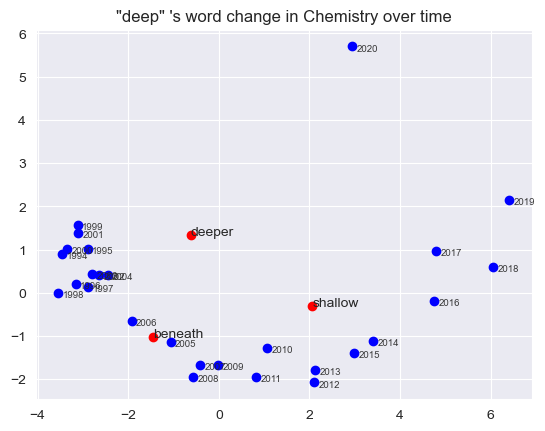

In [120]:
plot_word_period_shift("deep", all_che_twec_models, 1994, "Chemistry")
plot_semantic_neighbors(all_che_twec_models[0], "deep", 3)

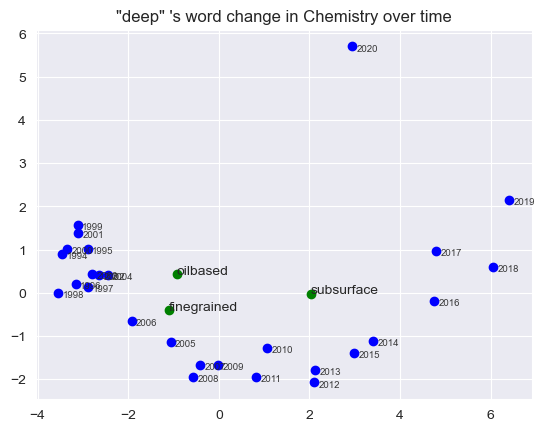

In [119]:
plot_word_period_shift("deep", all_che_twec_models, 1994, "Chemistry")
plot_semantic_neighbors(all_che_twec_models[-1], "deep", 3, 'g')

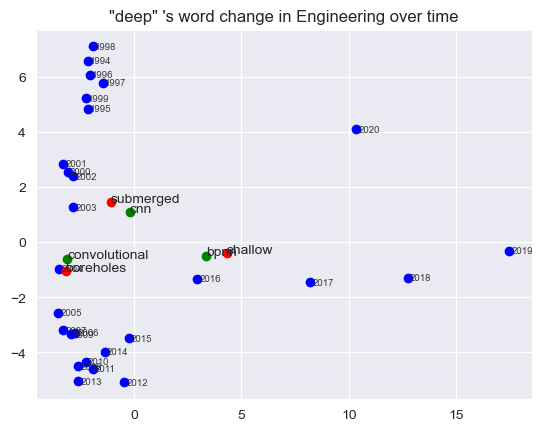

In [115]:
plot_word_period_shift("deep", all_eng_twec_models, 1994, "Engineering")
plot_semantic_neighbors(all_eng_twec_models[0], "deep", 3)
plot_semantic_neighbors(all_eng_twec_models[-1], "deep", 3, 'g')

# context change

In [136]:
def word_period_shift_reduced(word, all_models):
    WORD = word # "deep"
    vec_ls = []
    for model in all_models:
        if WORD in model.wv:
            vec_ls.append(model.wv[WORD])

    pca = PCA(n_components=2)
    reduced_vec_ar = pca.fit_transform(vec_ls)
    return reduced_vec_ar

def plot_semantic_neighbors2(neighbor, models, start=True):
    i = 0 if start else -1
    sim_x, sim_y = word_period_shift_reduced(neighbor, all_che_twec_models)[i]
    scatter(sim_x, sim_y)
    text(sim_x, sim_y, s=neighbor)

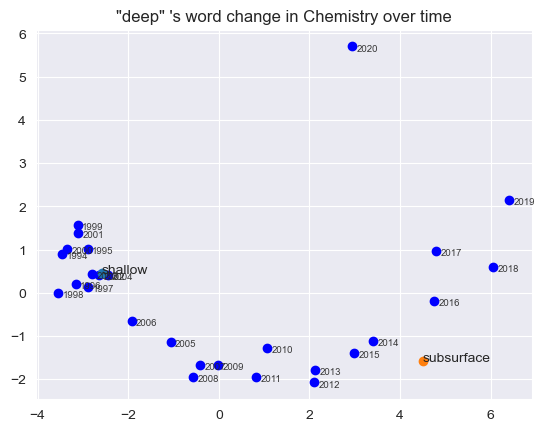

In [132]:
plot_word_period_shift("deep", all_che_twec_models, 1994, "Chemistry")
for simwd, _ in all_che_twec_models[0].wv.most_similar("deep", topn=1):
    plot_semantic_neighbors2(simwd, all_che_twec_models, start=True)
for simwd, _ in all_che_twec_models[-1].wv.most_similar("deep", topn=1):
    plot_semantic_neighbors2(simwd, all_che_twec_models, start=False)

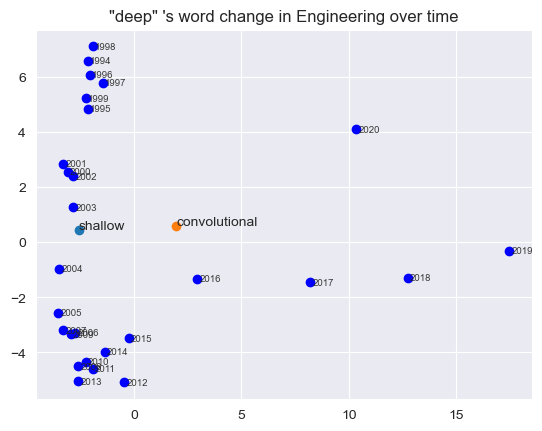

In [137]:
plot_word_period_shift("deep", all_eng_twec_models, 1994, "Engineering")
for simwd, _ in all_eng_twec_models[0].wv.most_similar("deep", topn=1):
    plot_semantic_neighbors2(simwd, all_eng_twec_models, start=True)
for simwd, _ in all_eng_twec_models[-1].wv.most_similar("deep", topn=1):
    plot_semantic_neighbors2(simwd, all_eng_twec_models, start=False)

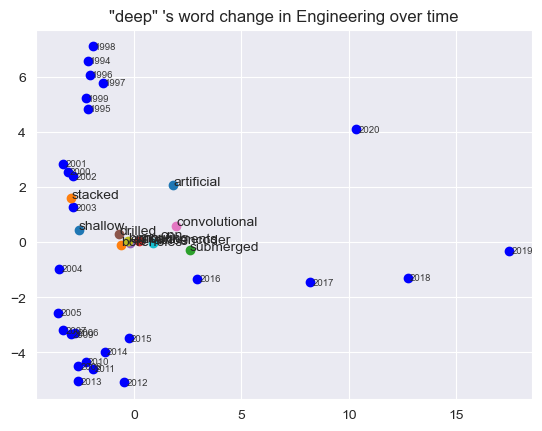

In [140]:
plot_word_period_shift("deep", all_eng_twec_models, 1994, "Engineering")
for simwd, _ in all_eng_twec_models[0].wv.most_similar("deep", topn=6):
    plot_semantic_neighbors2(simwd, all_eng_twec_models, start=True)
for simwd, _ in all_eng_twec_models[-1].wv.most_similar("deep", topn=6):
    plot_semantic_neighbors2(simwd, all_eng_twec_models, start=False)